**PyImageJ Tutorial**

This notebook covers how to use ImageJ as a library from Python. A major advantage of this approach is the ability to combine ImageJ with other tools available from the Python software ecosystem, including NumPy, SciPy, scikit-image, CellProfiler, OpenCV, ITK and more.

This notebook assumes familiarity with the ImageJ API. Detailed tutorials in that regard can be found in the other notebooks.

# 2 A simple example: `ij.py.show()` and `ij.ui().show()`

PyImageJ can display NumPy images and some* ImageJ Java images using `matplotlib.pyplot.imshow` with`ij.py.show()`. You can also open some images in an ImageJ window with `ij.ui().show()`. Let's look at both methods, first let's initialize PyImageJ:

_*: Both `ij.py.show()` and `ij.ui().show()` have limitations in dispaying image data. Briefly, `ij.py.show()` expects a 2D NumPy or ImageJ image, while `ij.ui().show()` expects an ImageJ image. For more information view the examples below._

In [1]:
import imagej

# initialize ImageJ in interactive mode
ij = imagej.init(mode='interactive')
print(f"ImageJ2 version: {ij.getVersion()}")

ImageJ2 version: 2.5.0/1.53r


## 2.1 `ij.py.show()` 

`ij.py.show()` displays images with `matplotlib.pyplot.imshow` behind the scenes. You can use either Python images (_e.g._ `np.ndarray`, `xarray.DataArray`) or ImageJ/Java images (_e.g._ `net.imagej.Dataset`, `net.imglib2.RandomAccessibleInterval`) so long as they are 2D image. >2D image data is not supported by `matplotlib.pyplot`. Let's open a couple different image data types and display them with `ij.py.show()`:

**`skimage` 2D**


View image data from `sckimage`.

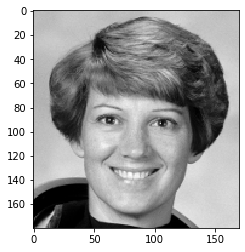

In [2]:
import skimage
import numpy as np

img = skimage.data.astronaut()
img = np.mean(img[10:190,140:310], axis=2)

ij.py.show(img, cmap = 'gray')

---------------------------
**`net.imagej.Dataset` 2D**

View an ImageJ `Dataset`.

_This sample data is available on the PyImageJ repository [here](https://github.com/imagej/pyimagej/tree/master/doc/sample-data)._

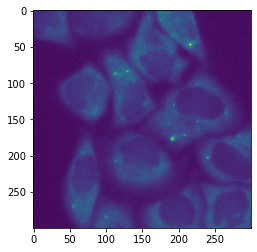

In [3]:
dataset_2d = ij.io().open('sample-data/test_still.tif')
ij.py.show(dataset_2d)

---------------------------
**`net.imagej.Dataset` 4D**

Image data that is >2D can't be displayed with `ij.py.show()` all at once, however you can display individual slices of the data like so:

_This sample data is available on the PyImageJ repository [here](https://github.com/imagej/pyimagej/tree/master/doc/sample-data)._

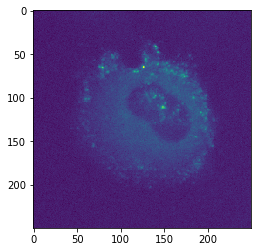

In [4]:
dataset_4d = ij.io().open('sample-data/test_timeseries.tif')
ij.py.show(dataset_4d[:, :, 2, 10]) # channel 2, frame 10

-------------------------
**`xarray.DataArray` 4D**

The same can be done with >2D `xarray.DataArray`s:

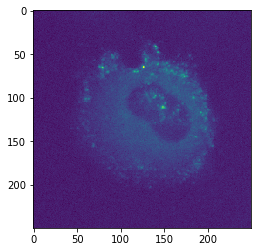

In [5]:
# get xarray from dataset
xarr_4d = ij.py.from_java(dataset_4d)
ij.py.show(xarr_4d[10, :, :, 2]) # channel 2, frame 10

## 2.2 `ij.ui().show()`

`ij.ui().show()` displays images with ImageJ's image viewer. Unlike `ij.py.show()`, `ij.ui().show()` only accepts ImageJ/Java images (_e.g._ `net.imagej.Dataset`, `net.imagej.ImgPlus`, `net.imglib2.RandomAccessibleInterval`). Eventhough `ij.ui().show()` only accepts Java objects, it can display > 2D image data. In order to display your NumPy/xarray data with ImageJ's viewer, convert your data to Java first with `ij.py.to_java()` before displaying it with `ij.ui().show()`.

**Important**: This section of the notebook only works locally (_i.e._ not on online on Binder) and requires either the `mode='interactive'` or `mode='gui'` initialization parameters to be set).

----------------
**`skimage` 2D**

View image data from `sckimage`.

In [6]:
import skimage
import numpy as np

img = skimage.data.astronaut()
img = np.mean(img[10:190,140:310], axis=2)
java_img = ij.py.to_java(img)

ij.ui().show(java_img)

---------------------------
**`net.imagej.Dataset` 2D**

View an ImageJ `Dataset`.

_This sample data is available on the PyImageJ repository [here](https://github.com/imagej/pyimagej/tree/master/doc/sample-data)._

In [7]:
dataset_2d = ij.io().open('sample-data/test_still.tif')
ij.ui().show(dataset_2d)

---------------------------
**`net.imagej.Dataset` 4D**

ImageJ can view this 4D image data without slicing to specific frames.

_This sample data is available on the PyImageJ repository [here](https://github.com/imagej/pyimagej/tree/master/doc/sample-data)._

In [8]:
dataset_4d = ij.io().open('sample-data/test_timeseries.tif')
ij.ui().show(dataset_4d)

-------------------------
**`xarray.DataArray` 4D**

`xarray.DataArray`s need to first be converted to Java before displaying with ImageJ.

In [9]:
# get xarray from dataset
xarr_4d = ij.py.from_java(dataset_4d)
new_dataset_4d = ij.py.to_java(xarr_4d)
ij.ui().show(new_dataset_4d)